<a href="https://colab.research.google.com/github/Arqamansari23/NLP/blob/main/2_Fine_Tuning_DistilBERT_for_NER_Tagging_using_HuggingFace_%7C_NLP_Hugging_Face_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What** **is** **NER**

NER stands for Named Entity Recognition, which is a natural language processing technique used to identify and classify named entities (such as names of people, places, organizations, dates, and more) in text. Here's a breakdown of NER in five steps:

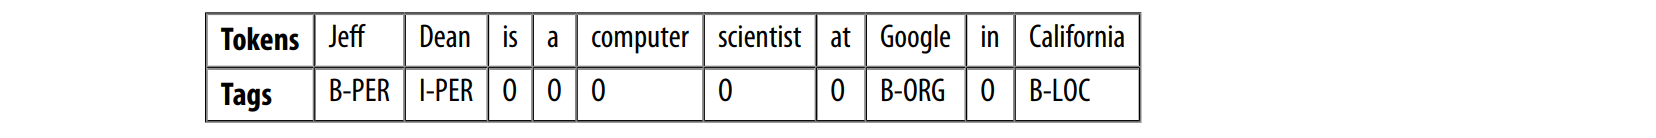

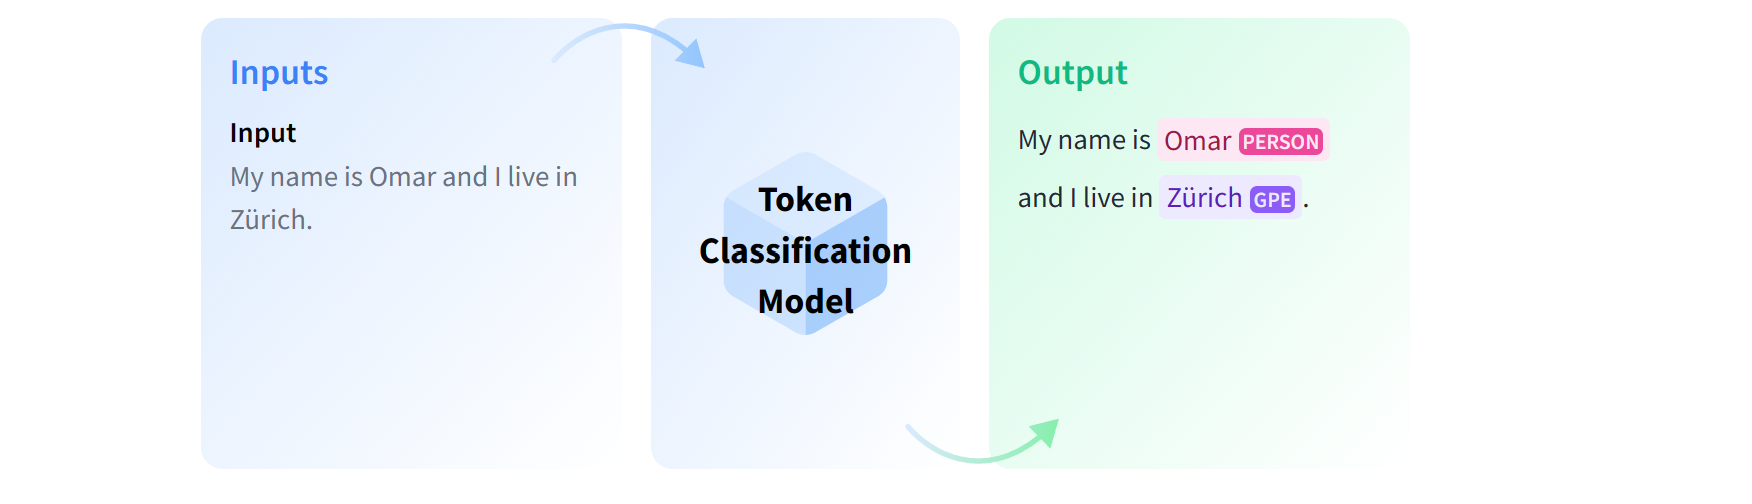

**DEMO**: https://demos.explosion.ai/displacy-ent

**Text Input**: NER begins with a piece of text, which can be a sentence, a paragraph, a document, or even a larger corpus of text.

**Tokenization**: The input text is split into individual words or tokens. This process is called tokenization, and it's a crucial step because NER works on a token-by-token basis.

**Entity Recognition**:
The tokenized text is analyzed to identify spans of tokens that correspond to named entities. NER systems use various techniques, such as rule-based approaches, machine learning models (like conditional random fields or deep learning models), or a combination of these methods to recognize entities.

**Entity/Token Classification**: Once the entities are recognized, they are classified into predefined categories like "person," "organization," "location," "date," "number," etc. These categories help organize and provide context to the recognized entities.

**Output**: The final output of the NER process is a structured representation of the original text with identified named entities and their corresponding categories. This output can be used for various purposes like information extraction, content summarization, sentiment analysis, and more.

# **IOB NER Tagging Format**

*  IOB tagging, which stands for Inside-Outside-Beginning tagging, is a common technique used in named entity recognition (NER) to label tokens in a text sequence to indicate their positions within named entities. It helps identify the starting, inside, and outside parts of entities within the text.




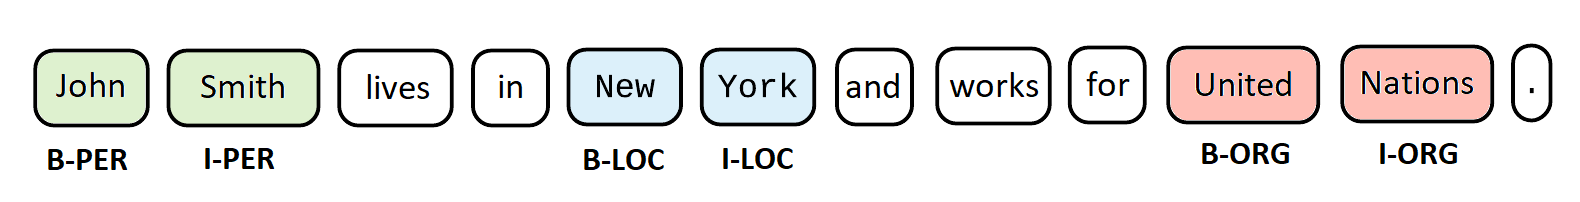



*   IOB Tagging: The tokens within a named entity are tagged as follows:
  *   "B" (Beginning): The first token of an entity is tagged with "B" to indicate the beginning of the entity.

  *   "I" (Inside): Tokens subsequent to the first token of an entity are tagged with "I" to indicate they are inside
  *   "O" (Outside): Tokens that are not part of any named entity are tagged with "O" to indicate they are outside any entity.





# **The Dataset**

#### We are using CONLLPP Dataset

https://huggingface.co/datasets/conllpp



*   CoNLLpp is a corrected version of the CoNLL2003 NER dataset where labels of 5.38% of the sentences in the test set have been manually corrected. The original CoNLL2003 dataset is available at https://www.clips.uantwerpen.be/conll2003/ner/.




#### Loading data set

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets

In [ ]:
import pandas as pd
from datasets import load_dataset
data = load_dataset('conllpp')
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

### Cheking Features of data

In [ ]:
data['train'].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In the data we have

*   Text Tokens
*   Pos_tags
*   Chunks
*   ner_tags


But we Only want NER tags





In [ ]:
df=pd.DataFrame(data['train'][:])
df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [ ]:
df[['tokens','ner_tags']]

,tokens,ner_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,"[Peter, Blackburn]","[1, 2]"
2,"[BRUSSELS, 1996-08-22]","[5, 0]"
3,"[The, European, Commission, said, on, Thursday...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,"[Germany, 's, representative, to, the, Europea...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."
...,...,...
14036,"[on, Friday, :]","[0, 0, 0]"
14037,"[Division, two]","[0, 0]"
14038,"[Plymouth, 2, Preston, 1]","[3, 0, 3, 0]"
14039,"[Division, three]","[0, 0]"


# **Data Preprocessing**

#### we are Creting New feature To map ner_tag index to actual NER

In [ ]:
data['train'].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In [ ]:
data['train'].features['ner_tags']

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [ ]:
data['train'].features['ner_tags'].feature

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None)

In [ ]:
data['train'].features['ner_tags'].feature.names    # we got all the Unique NER features

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
NER_FEATURES=data['train'].features['ner_tags'].feature.names

In [ ]:
for i , features in enumerate(NER_FEATURES):
  print(i,features)

0 O
1 B-PER
2 I-PER
3 B-ORG
4 I-ORG
5 B-LOC
6 I-LOC
7 B-MISC
8 I-MISC


In [ ]:
index_to_tag={index:NER for index,NER in enumerate(NER_FEATURES)}
index_to_tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

In [ ]:
tag_to_index={NER:index for index,NER in enumerate(NER_FEATURES)}
tag_to_index

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6,
 'B-MISC': 7,
 'I-MISC': 8}

In [ ]:
tags = data['train'].features['ner_tags'].feature
tags.int2str(3)

'B-ORG'

In [ ]:
def Building_new_feature_Index_To_NER(Data):
  new_feature={'ner_tags_str': [tags.int2str(id) for id in Data['ner_tags']]}
  return new_feature

In [ ]:
data = data.map(Building_new_feature_Index_To_NER)

In [ ]:
df=pd.DataFrame(data['train'][:])
df.head()

,id,tokens,pos_tags,chunk_tags,ner_tags,ner_tags_str
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]","[B-PER, I-PER]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]","[B-LOC, O]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ...","[O, B-ORG, I-ORG, O, O, O, O, O, O, B-MISC, O,..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P..."


# **Tokanization**

#### Importing Tokanizer for "distilbert-base-cased" model

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### Sample Example Of Tokanization

In [ ]:
data['train']['tokens'][0]    # Take first sentence token from the data

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']

In [ ]:
inputs = data['train'][0]['tokens']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.tokens())

['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']


In [ ]:
inputs

{'input_ids': [101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
inputs.tokens()


['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]']

### Now Here a Major Problem Occur

In [ ]:
###Now Here a Major Problem Occur

In [ ]:
print(inputs.tokens())
print(data['train']['ner_tags_str'][0])
print(data['train']['ner_tags'][0])

['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
[3, 0, 7, 0, 0, 0, 7, 0, 0]


The Problem is

*   When we do tokanization on sentence The word Lamb is divided into 2 words 'la' and '##mb'  
*  "##" means the word is connected with previous word


*   Now the problem is we have 10 words excluding CLS and SEP
*   And the labels are only 9

*   To solve this problem we shoud allign them both








#### Solution

In [ ]:
def align_labels_with_tokens(labels, word_ids):
  new_labels = []
  current_word=None
  for word_id in word_ids:
    if word_id != current_word:
      current_word = word_id
      label = -100 if word_id is None else labels[word_id]
      new_labels.append(label)

    elif word_id is None:
      new_labels.append(-100)

    else:
      label = labels[word_id]

      if label%2==1:
        label = label + 1
      new_labels.append(label)

  return new_labels










In [ ]:
labels = data['train'][0]['ner_tags']
word_ids = inputs.word_ids()
print(labels, word_ids)

[3, 0, 7, 0, 0, 0, 7, 0, 0] [None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]


In [ ]:
align_labels_with_tokens(labels, word_ids)

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]

In [ ]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)

  all_labels = examples['ner_tags']

  new_labels = []
  for i, labels in enumerate(all_labels):
    word_ids = tokenized_inputs.word_ids(i)
    new_labels.append(align_labels_with_tokens(labels, word_ids))

  tokenized_inputs['labels'] = new_labels

  return tokenized_inputs

#### Tokanizing dataset

In [ ]:
tokenized_datasets = data.map(tokenize_and_align_labels, batched=True, remove_columns=data['train'].column_names)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

#### Data Collation

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [ ]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(2)])
batch

{'input_ids': tensor([[  101,  7270, 22961,  1528,  1840,  1106, 21423,  1418,  2495, 12913,
           119,   102],
        [  101,  1943, 14428,   102,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])}

# **Performance Matrices**

In [ ]:
!pip install seqeval
!pip install evaluate

import evaluate
metric = evaluate.load('seqeval')

In [ ]:
import numpy as np

def compute_metrics(eval_preds):
  logits, labels = eval_preds

  predictions = np.argmax(logits, axis=-1)

  true_labels = [[label_names[l] for l in label if l!=-100] for label in labels]

  true_predictions = [[label_names[p] for p,l in zip(prediction, label) if l!=-100]
                      for prediction, label in zip(predictions, labels)]

  all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

  return {"precision": all_metrics['overall_precision'],
          "recall": all_metrics['overall_recall'],
          "f1": all_metrics['overall_f1'],
          "accuracy": all_metrics['overall_accuracy']}

# **Model Training**

In [ ]:
ner_feature = data['train'].features['ner_tags']
ner_feature

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [ ]:
label_names = ner_feature.feature.names
label_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
id2label = {i:label for i, label in enumerate(label_names)}
label2id = {label:i for i, label in enumerate(label_names)}

In [ ]:
labels = data['train'][0]['ner_tags']
labels = [label_names[i] for i in labels]
labels

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

In [ ]:
predictions = labels.copy()
predictions[2] = "O"

metric.compute(predictions=[predictions], references=[labels])

{'MISC': {'precision': 1.0,
  'recall': 0.5,
  'f1': 0.6666666666666666,
  'number': 2},
 'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 0.6666666666666666,
 'overall_f1': 0.8,
 'overall_accuracy': 0.8888888888888888}

In [ ]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
                                                    model_checkpoint,
                                                    id2label=id2label,
                                                    label2id=label2id)

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.num_labels

9

In [ ]:
from transformers import TrainingArguments

args = TrainingArguments("distilbert-finetuned-ner",
                         evaluation_strategy = "epoch",
                         save_strategy="epoch",
                         learning_rate = 2e-5,
                         num_train_epochs=1,
                         weight_decay=0.01)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = tokenized_datasets['train'],
                  eval_dataset = tokenized_datasets['validation'],
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.090900,0.084999,0.885429,0.909122,0.897119,0.975982


TrainOutput(global_step=1756, training_loss=0.1575357408892864, metrics={'train_runtime': 125.6796, 'train_samples_per_second': 111.721, 'train_steps_per_second': 13.972, 'total_flos': 153520489309824.0, 'train_loss': 0.1575357408892864, 'epoch': 1.0})

In [ ]:
!zip -r distilbert_ner.zip . -i /content/distilbert-finetuned-ner/checkpoint-5268

	zip warning: zip file empty


In [ ]:
from transformers import pipeline

checkpoint = "/content/distilbert-finetuned-ner/checkpoint-5268"
token_classifier = pipeline(
    "token-classification", model=checkpoint, aggregation_strategy="simple"
)

token_classifier("My name is Laxmi Kant Tiwari. I work at KGP Talkie and live in Mumbai")

OSError: Incorrect path_or_model_id: '/content/distilbert-finetuned-ner/checkpoint-5268'. Please provide either the path to a local folder or the repo_id of a model on the Hub.